# Supervised Machine Learning (1st Serve Points Won vs. Break Points Faced)

### 1. Import Libraries
### 2. Initial Hypotheses and Models
### 3. df_matchstats: winner's height vs. 1st Serve points won
- Data Cleaning
- Data Prep for Regression Analysis
- Regression Analysis
### 4. Final Thoughts

# For Later

### 6. I may repeat this process for df_clay, df_grass and df_hard

In [28]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [30]:
#Show all columns
pd.set_option('display.max_columns', None)

In [31]:
#Show all rows
pd.set_option('display.max_rows', None)

## 2. Initial Hypotheses and Models

### Hypotheses

- 1st serve percentage does not affect # of BP faced
- The higher the "Percentage of 1st serve points won", the fewer the # of BP faced
- The higher the "Percentage of 2nd serve points won", the fewer the # of BP faced
- A player's height had a positive correlation with the percentage of both 1st and 2nd serve points won

### Aim to create following models
- Predict what % of first and second won would need to be to face 0 break points
- Predict a player's 1st and 2nd serve points won percentage based on their height

## 3. Winner Height vs. Serve Points Won

In [32]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [33]:
#Columns
df_matchstats.columns

Index(['tourney_id', 'Year', 'tourney_name', 'surface', 'tourney_level',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_age', 'winner_rank',
       'winner_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_#ServeGames',
       'w_#aces', 'w_#dfs', 'w_#ServePoints', 'w_#1stServesIn',
       'w_#2ndServePoints', 'w_%1stServesIn', 'w_#1stWon', 'w_%1stWon',
       'w_#2ndWon', 'w_%2ndWon', 'w_bpSaved', 'w_#bpFaced', 'l_#ServeGames',
       'l_#aces', 'l_#dfs', 'l_#ServePoints', 'l_#1stServesIn',
       'l_#2ndServePoints', 'l_%1stServesIn', 'l_#1stWon', 'l_%1stWon',
       'l_#2ndWon', 'l_%2ndWon', 'l_bpSaved', 'l_#bpFaced'],
      dtype='object')

In [34]:
df_matchstats.isnull().sum()
#remove missing winner and loser heights

tourney_id              0
Year                    0
tourney_name            0
surface                 0
tourney_level           0
winner_id               0
winner_ioc              0
winner_name             0
winner_age              0
winner_rank            89
winner_ht             198
loser_id                0
loser_ioc               0
loser_name              0
loser_rank            296
loser_ht              729
loser_age               2
best_of                 0
round                   0
minutes              1456
w_#ServeGames           0
w_#aces                 0
w_#dfs                  0
w_#ServePoints          0
w_#1stServesIn          0
w_#2ndServePoints       0
w_%1stServesIn          0
w_#1stWon               0
w_%1stWon               0
w_#2ndWon               0
w_%2ndWon               0
w_bpSaved               0
w_#bpFaced              0
l_#ServeGames           0
l_#aces                 0
l_#dfs                  0
l_#ServePoints          0
l_#1stServesIn          0
l_#2ndServeP

In [35]:
df_matchstats = df_matchstats[df_matchstats['winner_ht'].isnull()== False]
df_matchstats = df_matchstats[df_matchstats['loser_ht'].isnull()== False]

In [36]:
df_matchstats.isnull().sum()

tourney_id              0
Year                    0
tourney_name            0
surface                 0
tourney_level           0
winner_id               0
winner_ioc              0
winner_name             0
winner_age              0
winner_rank            49
winner_ht               0
loser_id                0
loser_ioc               0
loser_name              0
loser_rank            152
loser_ht                0
loser_age               0
best_of                 0
round                   0
minutes              1442
w_#ServeGames           0
w_#aces                 0
w_#dfs                  0
w_#ServePoints          0
w_#1stServesIn          0
w_#2ndServePoints       0
w_%1stServesIn          0
w_#1stWon               0
w_%1stWon               0
w_#2ndWon               0
w_%2ndWon               0
w_bpSaved               0
w_#bpFaced              0
l_#ServeGames           0
l_#aces                 0
l_#dfs                  0
l_#ServePoints          0
l_#1stServesIn          0
l_#2ndServeP

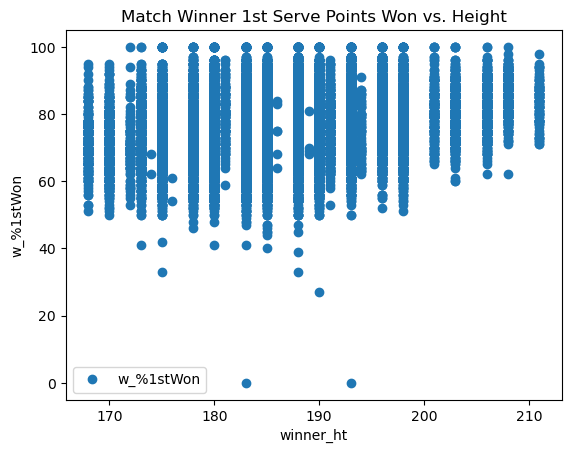

In [37]:
# Scatterplot - winner_ht vs. w_%1stWon 

df_matchstats.plot(x = 'winner_ht', y='w_%1stWon',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 1st Serve Points Won vs. Height')  
plt.xlabel('winner_ht')  
plt.ylabel('w_%1stWon')  
plt.show()

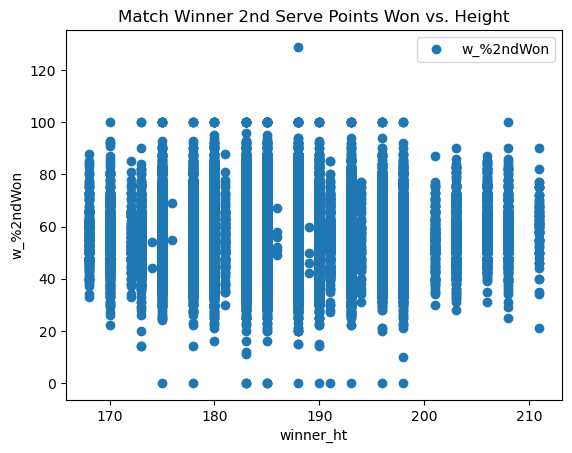

In [38]:
# Scatterplot - winner_ht vs. w_%2ndWon 

df_matchstats.plot(x = 'winner_ht', y='w_%2ndWon',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 2nd Serve Points Won vs. Height')  
plt.xlabel('winner_ht')  
plt.ylabel('w_%2ndWon')  
plt.show()

#Remove the weird outlier that is above 120%

### Prep for Regression Analysis

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_matchstats['winner_ht'].values.reshape(-1,1)
y = df_matchstats['w_%1stWon'].values.reshape(-1,1)

In [40]:
X

array([[188.],
       [190.],
       [175.],
       ...,
       [185.],
       [183.],
       [188.]])

In [41]:
y

array([[79],
       [75],
       [71],
       ...,
       [74],
       [72],
       [81]])

In [42]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [43]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

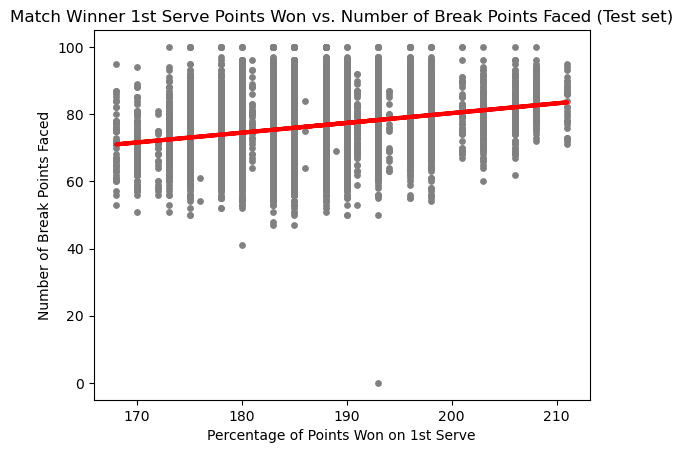

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Match Winner 1st Serve Points Won vs. Number of Break Points Faced (Test set)')
plot_test.xlabel('Percentage of Points Won on 1st Serve')
plot_test.ylabel('Number of Break Points Faced')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29085059]]
Mean squared error:  61.530367505834384
R2 score:  0.062036034087960545


In [49]:
y_predicted

array([[75.93850019],
       [75.93850019],
       [76.81105198],
       ...,
       [77.39275316],
       [74.48424722],
       [78.26530495]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,74,75.938500
1,62,75.938500
2,78,76.811052
3,69,74.484247
4,81,74.484247
5,75,76.811052
6,68,75.938500
7,83,75.938500
8,88,76.811052
9,77,75.938500


##### Compare how the regression fits the training set

In [52]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29085059]]
Mean squared error:  62.45300786892159
R2 score:  0.05886546626904254


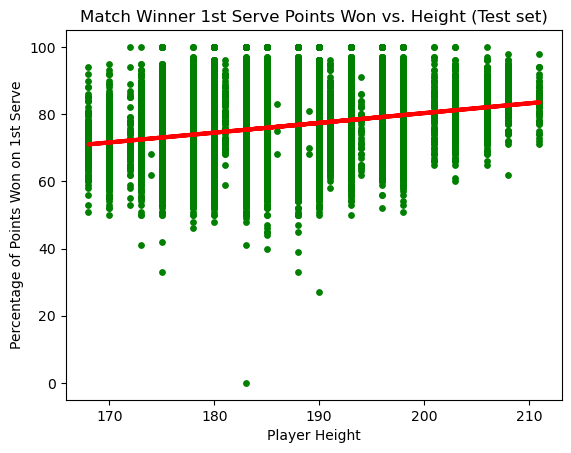

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Match Winner 1st Serve Points Won vs. Height (Test set)')
plot_test.xlabel('Player Height')
plot_test.ylabel('Percentage of Points Won on 1st Serve')
plot_test.show()

### 4. Final Thoughts

A player's height cannot accurately predict the percentage of points they will win on their first serve